# Final Project for STAT201: 

# Comparing Insulin Level across Individuals With and Without Breast Cancer

Group 16: Benjamin Gerochi, Mia Ling, Jessie Megan, Hejia Qiu

# I. Introduction

Breast cancer occurs when the abnormal growth of breast cells leads to the formation of tumors (World Health Organization [WHO], 2023). An increase in insulin secretion due to insulin resistance is hypothesized to be a risk factor for breast cancer (Srinivasan et al., 2022). However, no existing evidence can give a definite conclusion regarding this issue (Cust et al., 2008). Thus, we want to study whether people who got breast cancer typically have a higher insulin level than those who are healthy. We will use the difference in means and the difference in medians of insulin as parameters. Mean and median are good at measuring the center of the data, and median works well with presence of outliers (Döring, 2018). Therefore, they can satisfy our interest in typical differences in insulin levels.

The dataset, “Breast Cancer Coimbra,” contains 116 observations, where 64 are from breast cancer patients and 52 are from healthy people. There are 10 columns, with 9 quantitative variables collected from blood analysis and 1 categorical variable (Diagnosis), which shows whether an observation is from a breast cancer patient or healthy control (Patrcio et al., 2018). The variables we focused on to perform our hypothesis test and construct confidence intervals will be Insulin and Diagnosis. The hypothesis to be tested are as follows:
- $H_0$: There is no difference in insulin levels between healthy individuals and breast cancer patients 
- $H_a$: Breast cancer patients have higher insulin levels compared to healthy individuals.

# II. Method and results

In [1]:
# please run this before run all other cells
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(taxyvr)
library(cowplot)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# we have set the seed here to make the results reproducible


set.seed(1)

## A. Preliminary results

### 1. Demonstrate that the dataset can be read from the web into R.

In [3]:
# Read using Google Drive direct output link (directly read from web; no need for xlsx file)

breast_cancer <- read_csv("https://drive.google.com/uc?export=download&id=1Qd3yeNQcVt0IfO_hQpZi-jivJ28uMxl4")
head(breast_cancer)

Rows: 116 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410,1


**Table II.A.1.1: Breast Cancer Coimbra dataset original**

### 2. Clean and wrangle the data into a tidy format.

In [4]:
# Cleaned the dataset for more clarity by: 
# 1. Renaming the classification column to diagnosis
# 2. Changing its values from 1 and 2 to Healthy and Sick
# 3. Selecting only the 2 relevant columns (Diagnosis and Insulin)

breast_cancer_tidy <- breast_cancer %>%
rename(Diagnosis = Classification) %>%
mutate(Diagnosis = ifelse(Diagnosis == 2, "Sick", "Healthy")) %>%
filter(!is.na(Insulin) & !is.na(Diagnosis)) %>%
select(Diagnosis, Insulin)

head(breast_cancer_tidy)

Diagnosis,Insulin
<chr>,<dbl>
Healthy,2.707
Healthy,3.115
Healthy,4.498
Healthy,3.226
Healthy,3.549
Healthy,3.226


**Table II.A.2.1: Breast Cancer Coimbra dataset tidy**

### 3. Plot the relevant raw data, tailoring the plot in a way that addresses the question.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


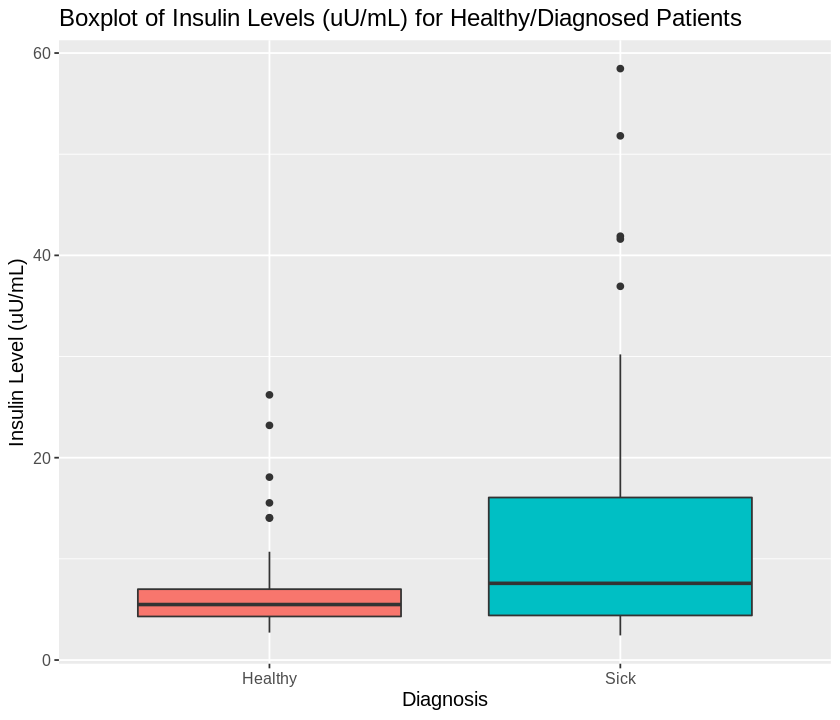

In [5]:
# Visualizing a boxplot of the distributions of insulin levels for Healthy and Sick patients

options(repr.plot.width = 7, repr.plot.height = 6)

insulin_boxplots <-
    breast_cancer_tidy %>% 
    ggplot() +
    geom_boxplot(aes(x = Diagnosis, y = Insulin, fill = Diagnosis)) +
    theme(text = element_text(size = 12)) +
    ggtitle("Boxplot of Insulin Levels (uU/mL) for Healthy/Diagnosed Patients") + 
    xlab("Diagnosis") + 
    ylab("Insulin Level (uU/mL)") + 
    guides(fill = FALSE)

insulin_boxplots

**Graph II.A.3.1: Boxplot of the distributions of insulin levels for healthy individuals and breast cancer patients**

These two boxplots compare the insulin level of healthy individuals and breast cancer patients. 

The plot shows insulin levels for healthy individuals and breast cancer patients are right-skewed. Besides, the median insulin level of healthy individuals is slightly lower than that of breast cancer patients.

The range of the middle 50% of the distribution is narrower for healthy individuals. The upper 50% range insulin level of breast cancer patients is much higher than healthy people. The length of the boxplot indicates that the insulin level of sick people is more spread out.

In both diagnoses, there are outliers, which indicate an unusually high insulin level that may need further investigation.

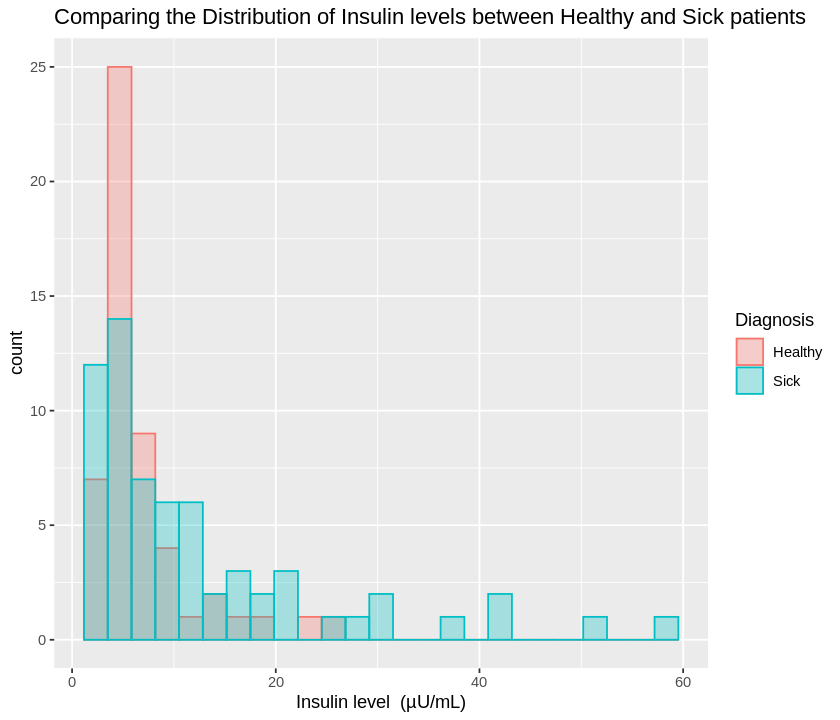

In [6]:
# Creating a layered histogram to compare the distributions of insulin levels between Sick and Healthy patients

histogram_compare <- ggplot(breast_cancer_tidy, aes(x = Insulin, fill = Diagnosis, colour = Diagnosis)) + 
  geom_histogram(bins=25, alpha = 0.3, position = "identity") +
  ggtitle("Comparing the Distribution of Insulin levels between Healthy and Sick patients") +
  xlab("Insulin level  (µU/mL)")

histogram_compare

**Graph II.A.3.2: Layered histogram to compare the distributions of insulin levels between Sick and Healthy patients**

According to the above histogram comparison, the center of the distribution for healthy individuals is at about 7µU/mL, which is smaller than that of the breast cancer patients (about 10µU/mL). The insulin levels of breast cancer patients have a higher range and are more right-skewed. There are more breast cancer patients patients who tend to have high levels of insulin.


### 4. Compute estimates of the parameters identified across the groups. Present this in a table. 

In [7]:
# Table Presentation of Computed Estimates for Difference in Mean and Median

parameter_estimates <- breast_cancer_tidy %>%
group_by(Diagnosis) %>%
summarize(mean = mean(Insulin),
          median = median(Insulin)) %>%
pivot_longer(names_to = "Estimator", 
             values_to = "Values",
             cols = c(mean, median)) %>%
pivot_wider(names_from = Diagnosis,
            values_from = Values) %>%
mutate(Difference = Sick - Healthy)

parameter_estimates

Estimator,Healthy,Sick,Difference
<chr>,<dbl>,<dbl>,<dbl>
mean,6.933769,12.51322,5.57945
median,5.483500,7.58000,2.09650


**Table II.A.4.1: Estimates of the parameter**

## B. Method plan 

### Statistical Inference Details

The dataset in this analysis is from a reputable source, the UC Irvine Machine Learning Repository. The usage of confidence intervals and hypothesis testing can make the report trustworthy because confidence intervals let us understand the range of possible values for our parameter and how confident we are, while hypothesis testing gives us information on how plausible our observed statistics are under hypothesized parameters (Ismay & Kim, 2023). We get a sense of the reliability of our results.

The plots and estimates produced are not enough to be given to stakeholders as they are information from one sample, but due to sampling variation, different samples may produce different estimates. It’s not proper to conclude about our question only considering estimates from a single sample. Hypothesis testing and confidence intervals can address this gap since they address sampling variation. 

The hypotheses to be tested are:
- H0: There is no difference in insulin levels between healthy individuals and breast cancer patients 
- Ha: Breast cancer patients have higher insulin levels compared to healthy individuals.

The confidence interval is set to a commonly used value of 95% and the significance level is set to 5% (Ismay & Kim, 2023). We plan to report the confidence intervals to show plausible values for differences. We will also report p-values, and if the p-value is smaller than 5%, we can reject the null hypothesis.

In performing hypothesis testing and confidence intervals, we will use both the asymptotic method and bootstrapping for the mean since the sample size is large enough, while only using bootstrapping for the median. The asymptotic method involves mathematical formulas, while bootstrapping is versatile and applicable for many types of statistics (Ismay & Kim, 2023).

Our expectation for our result is that the breast cancer patients have a higher insulin level compared to healthy individuals

### Assumption Justification

To perform hypothesis testing and confidence interval using bootstrap method, the assumption needed is that the sample is randomly drawn (Ismay & Kim, 2023). Although there is no information provided regarding the sampling method, the dataset is from a reliable source as mentioned before. In addition, there is no evidence indicating the sample selection is not random. 

To perform hypothesis testing and confidence interval using asymptotic method, the assumption needed is that the sample is randomly drawn, the values inside the sample are independent, and the sample is large enough (for sample mean, a sample size large than 30 is considered large enough). There is no evidence indicating the sample selection is not random or independent. The number of observations from breast cancer patients is 64 and from healthy people is 52, which are both greater than 30, and are smaller than 10% of the population. Therefore, we can perform the asymptotic method on the difference in sample mean.

In summary, since no assumptions and conditions are obviously violated, we can have some trust in the results. 

## C. Results after executing the plan

### 1. Confidence interval and hypothesis testing on mean using bootstrapping method


In [8]:
#generate bootstrap distribution for difference in means of insulin level
bootstrap_dist_mean <- breast_cancer_tidy %>%
specify(formula=Insulin~Diagnosis) %>%
generate(reps=2000, type="bootstrap") %>%
calculate(stat="diff in means", c("Sick", "Healthy"))
head(bootstrap_dist_mean)

replicate,stat
<int>,<dbl>
1,1.961882
2,8.197414
3,7.181950
4,5.348599
5,3.347382
6,4.629293


**Table II.C.1.1: Bootstrap distribution for difference in mean of insulin between healthy and sick**

We will first construct a 95% confidence interval on difference of means in insulin level. In the code above, we use infer package to specify our response variable to be "Insulin" and explanatory variable to be "Diagnosis", get 2000 bootstrap samples from original sample "breast_cancer_tidy", and calculate difference in means (Sick-Healthy) for those bootstrap samples to get bootstrap distribution.

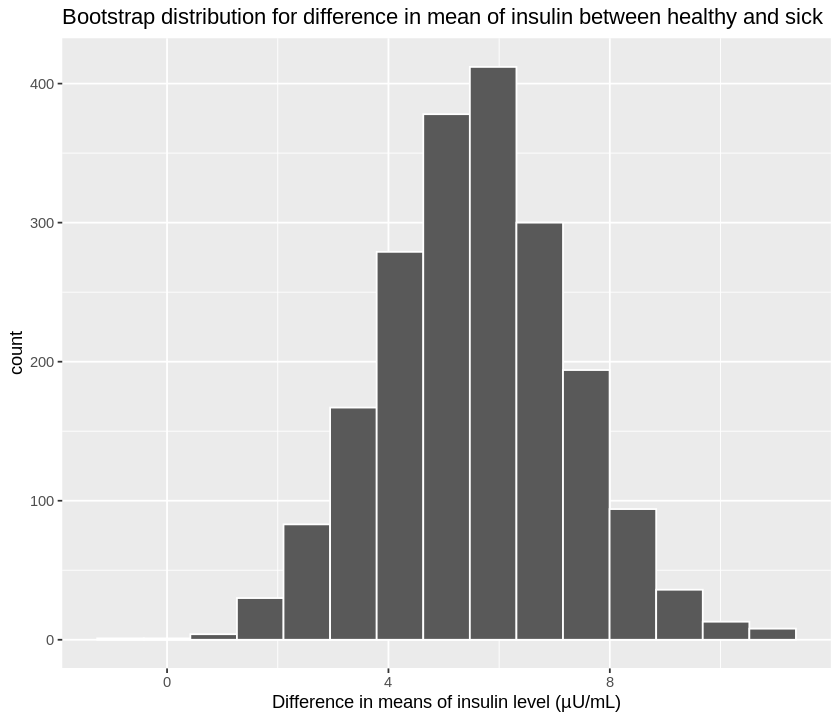

In [9]:
#visualize bootstrap distribution for difference in means of insulin level
visualize_bootstrap_dist_mean <- bootstrap_dist_mean %>%
visualize(bins=15, color="white") +
ggtitle("Bootstrap distribution for difference in mean of insulin between healthy and sick") +
xlab("Difference in means of insulin level (µU/mL)")
visualize_bootstrap_dist_mean

**Graph II.C.1.1: Bootstrap distribution for difference in mean of insulin between healthy and sick**

We then visualize our bootstrap distribution with a histogram plotted above. The bootstrap sampling distribution is symmetric, single-peaked, and roughly normal. The center of it is at about 6 µU/mL, and most values are between 4 µU/mL to 8  µU/mL. 

In [10]:
#get the 95% confidence interval for difference in means of insulin level
ci_mean_bootstrap <- bootstrap_dist_mean %>%
get_ci(0.95, "percentile")
ci_mean_bootstrap 

lower_ci,upper_ci
<dbl>,<dbl>
2.283603,8.951514


**Table II.C.1.2: 95% confidence interval for difference in mean of insulin between healthy and sick**

We then use "get_ci" on the bootstrap distribution to get the 95% confidence interval based on percentile method. Our 95% confidence interval is (2.283603, 8.951514). This means we are 95% confident that the true difference in means of insulin level between breast cancer patients and healthy individuals is captured by the 95% confidence interval of (2.283603, 8.951514). We can connect this to hypothesis testing as well. Our 95% confidence interval does not contain the value 0, which is the hypothesized difference in means. Thus, we got enough evidence to reject the null hypothesis that the difference in means of insulin level between breast cancer patients and healthy people is 0 at 5% significance level. The whole confidence interval is above 0, which gives evidence to suggest that mean insulin level of breast cancer patients is higher than that of the healthy individuals. 

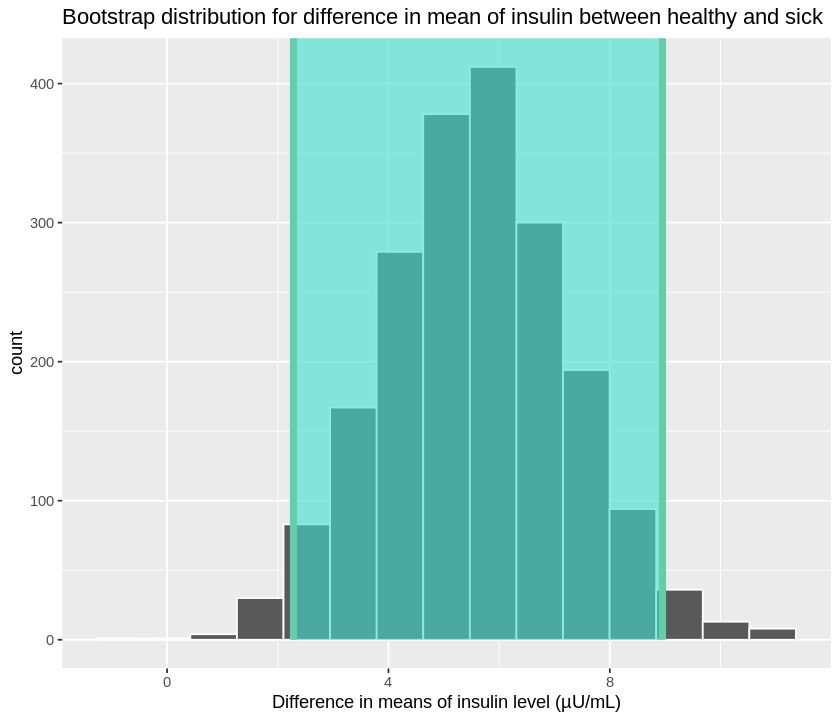

In [11]:
#visualize 95% confidence interval for difference in means of insulin level
visualize_bootstrap_ci_mean <- visualize_bootstrap_dist_mean +
shade_ci(ci_mean_bootstrap)
visualize_bootstrap_ci_mean

**Graph II.C.1.2: Confidence interval for bootstrap distribution for difference in insulin level**

Finally, we visualize the confidence interval as above. We can see 0 is not included in the shaded area of 95% confidence interval, and the entire shaded area is lying at the right side of 0. 

In [12]:
#generate null distribution for difference in means of insulin level
null_bootstrap_dist_mean <- breast_cancer_tidy %>%
specify(formula=Insulin~Diagnosis) %>%
hypothesize("independence")%>%
generate(reps=2000, type="permute") %>%
calculate(stat="diff in means", c("Sick", "Healthy"))
head(null_bootstrap_dist_mean)

replicate,stat
<int>,<dbl>
1,3.00956851
2,0.19587139
3,-2.70113101
4,0.05881851
5,0.46143750
6,-2.10000841


**Table II.C.1.3: Null distribution for difference in means of insulin between healthy and sick**

Here, we start to perform the hypothesis test on difference in means using bootstrap method. The specific hypotheses we are having here are:


$H_0$: There is no difference in the mean insulin level between healthy people and breast cancer patients ($Mean_s - Mean_h = 0$).

$H_a$: The mean insulin level of breast cancer patients is greater than the mean insulin level of healthy people ($Mean_s - Mean_h > 0$).


We use the infer package in R on our sample to specify the response and explanatory variables, generate 2000 samples (using permutation) under our null hypothesis that the difference of means in insulin level between people with and without breast cancer is zero, and calculate the difference in means to form a null distribution of difference in means of insulin level between healthy individuals and breast cancer patients.

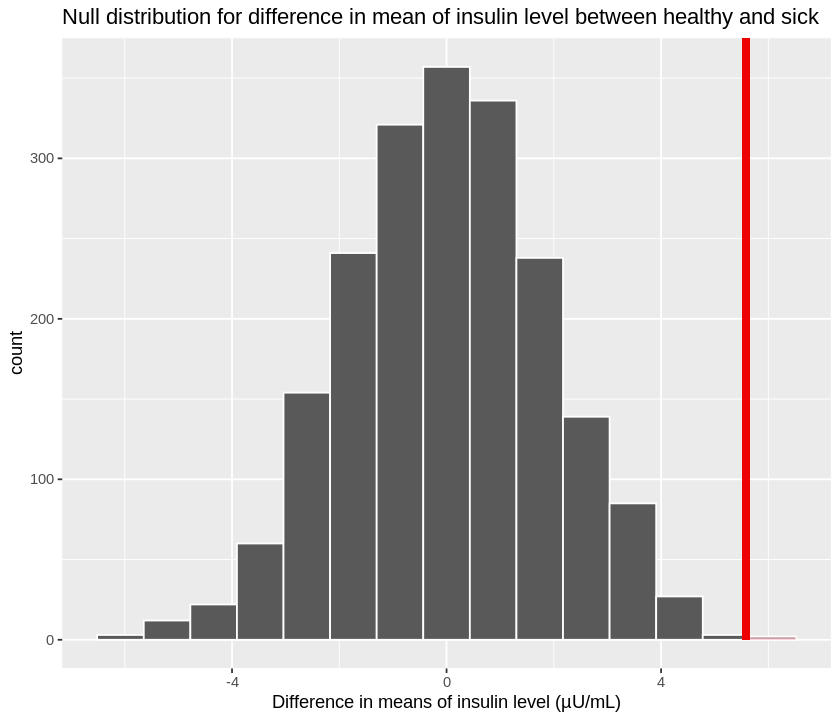

In [13]:
#visualize null distribution for difference in means of insulin level
visualize_null_dist_bootstrap_mean <- null_bootstrap_dist_mean %>%
visualize(bins=15, color="white") +
ggtitle("Null distribution for difference in mean of insulin level between healthy and sick") +
xlab("Difference in means of insulin level (µU/mL)") +
shade_p_value(parameter_estimates$Difference[1], direction = "greater")
visualize_null_dist_bootstrap_mean

**Graph II.C.1.3: Null distribution for difference in mean of insulin level between healthy and sick**

Then, we visualize our null distribution by plotting a histogram. We also show our test statistics on graph (the red vertical line) and shaded the upper tails, where is the region of p value. We can see the null distribution is roughly normal, centered at 0 µU/mL, and ranges from about -6 µU/mL to 6 µU/mL. The observed difference in means is at the right side of the plot, and the region above it on the histogram is relatively small, which indicates p value seems to be small. We will get the actual p value in the next step. 

In [14]:
#calculate the p value
p_bootstrap_mean <- null_bootstrap_dist_mean %>% 
get_p_value(obs_stat=parameter_estimates$Difference[1], direction= "greater" )
p_bootstrap_mean

p_value
<dbl>
0.001


**Table II.C.1.4: p value for difference in mean of insulin between healthy and sick**

We calculate the p value using "get_p_value" in R. The p-value shows under the null hypothesis of there is no difference in means of insulin level, the chance of encountering a value as extreme as our observed difference in means or even more extreme is 0.001. This indicates if the null hypothesis is true, it is will be very unlikely to observe the test statistic we observed. Since p value is smaller than previously determined significance level of 5%, we have enough enough evidence to reject the null hypothesis that the mean insulin level is the same for healthy individuals and breast cancer patients, and to suggest that mean insulin level for breast cancer patients is higher.

### 2. Confidence interval and hypothesis testing on mean using asymptotics method

Now, we are going to construct a confidence interval on difference of means in insulin level by asymptotic method. Based on CLT, we can estimate sampling distribution of difference in means by normal distribution as function shown below. Since we don't have population means, difference in sample means will be used to estimate the center of sampling distribution. We will first calculate the sample mean and standard error of the insulin level for each group. Then, we will get the difference in means (mean insulin level for sick people minus mean insulin level for healthy people) and the standard error for difference in means to construct the confidence interval. 

$$
\bar{X}_{\text{Sick}}-\bar{X}_{\text{Healthy}}\sim N\left(\mu_{\text{Sick}} - \mu_{\text{Healthy}}, \sqrt{\frac{s^2_{\text{Sick}}}{n_{\text{Sick}}}+\frac{s^2_{\text{Healthy}}}{n_{\text{Healthy}}}}\right)
$$



In [15]:
#Calculate the sample mean and standard error for each group 

sample_summary<-breast_cancer_tidy|>group_by(Diagnosis)|>
         summarise(sample_average = mean(Insulin),
                    n=n(),
                    std_error = sd(Insulin)/sqrt(n()))
sample_summary

Diagnosis,sample_average,n,std_error
<chr>,<dbl>,<int>,<dbl>
Healthy,6.933769,52,0.673932
Sick,12.513219,64,1.539717


**Table II.C.2.1: sample mean, standard error, and size for healthy and sick**

In [16]:
#Calculate the difference in mean and the grouped standard error 

diff_in_mean<-sample_summary$sample_average[2]-sample_summary$sample_average[1]
diff_in_mean
grouped_sd<-sqrt(sample_summary$std_error[1]^2+sample_summary$std_error[2]^2)
grouped_sd

[1] 5.57945

[1] 1.680748

In [17]:
#Obtain CI
diff_clt_ci <- 
     tibble(lower_ci = (diff_in_mean - qnorm(0.975) * grouped_sd),
            upper_ci = (diff_in_mean + qnorm(0.975) * grouped_sd))

diff_clt_ci

lower_ci,upper_ci
<dbl>,<dbl>
2.285244,8.873655


**Table II.C.2.2: 95% confidence interval for difference in means of insulin between healthy and sick**

Now, we have obtained the 95% confidence interval useing the function: 

$$
CI\left(\mu_{\text{Sick}} - \mu_{\text{Healthy}}\right) = \left(\bar{X}_{\text{Sick}}-\bar{X}_{\text{Healthy}}\right) \pm z^*\sqrt{\frac{s^2_{\text{Sick}}}{n_{\text{Sick}}}+\frac{s^2_{\text{Healthy}}}{n_{\text{Healthy}}}}
$$

The 95% confidence interval is between 2.285244 and 8.873655, which means we are 95% confident that the true difference in means of insulin level between healthy people and breast cancer patients is captured by the 95% confidencce interval of (2.285244,8.873655). By connecting this to hypothesis testing, our 95% confidence interval is above and does not contain the value 0, which implies that we can reject the null hypothesis that the difference in means of insulin level between breast cancer patients and healthy people is 0 at 5% significance level and suggest that the mean insulin level of sick patients is higher than that of the healthy individuals.

Now, we are going to construct the hypothesis test. As we don't have enough information about the population standard deviation, we will first obtain the t-value and the degree of freedom using the formula below.




$$
T = \frac{\bar{x}_{\text{Sick}} - \bar{x}_{\text{Healthy}}}{\sqrt{\frac{s^2_{\text{Sick}}}{n_1}+\frac{s^2_{\text{Healthy}}}{n_2}}}
$$


$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

In [18]:
#Construct T-test 
#Obtain the T-Value
t_value <- ((sample_summary$sample_average[2] - sample_summary$sample_average[1])/
            sqrt((sample_summary$std_error[1]^2) +
            (sample_summary$std_error[2]^2)))
t_value


[1] 3.319623

In [19]:
#Construct T-test 
#Obtain the nu-value (degree of freedom)
mean_df<-(sample_summary$std_error[1]^2+sample_summary$std_error[2]^2)^2/
         (sample_summary$std_error[1]^4/(sample_summary$n[1]-1)+
          sample_summary$std_error[2]^4/(sample_summary$n[2]-1))
mean_df

[1] 85.57164

Now, we will calculate the p value based on the t-score and the degree of freedom we have obtained above. We want to find how incompatible our t score is under null distribution. 

In [20]:
#Construct T-test 
#Calculate P-value by calculation
P_value <- pt(t_value, mean_df , lower.tail=FALSE)
P_value

[1] 0.0006629451

We can also use the t.test function in R to calculte the p-value and t-score.

In [21]:
#Construct T-test by t.test function
t_test<-tidy(
    t.test(x= breast_cancer_tidy %>% filter(Diagnosis=="Sick") %>% select(Insulin), 
           y= breast_cancer_tidy %>% filter(Diagnosis=="Healthy") %>% select(Insulin), 
                    conf.level =0.95,
                    alternative="greater")
) %>% select(statistic, p.value)
t_test

statistic,p.value
<dbl>,<dbl>
3.319623,0.0006629451


**Table II.C.2.3: result of t.test function**

Both t.test function and step by step calculation give us a p value around 0.00066 which shows how extreme the observed difference in means of insulin between breast cancer patients and healthy individuals is. As the p value we obtain is smaller than the pre-determined significance level of 5%, we have enough evidence to reject the null hypothesis that the mean insulin level is the same for breast cancer patients and healthy individuals, and suggest that mean insulin level for breast cancer patients is higher.

### Comparison between bootstrap method and asymptotic method

Both the bootstrap and asymptotic methods provided similar results of confidence interval and p value, consistently showing that there is a statistically significant difference in the average insulin levels between healthy individuals and breast cancer patients. This suggests that both methods are appropriate tools to conduct our current analysis. The reason why we obtain similar results could be that assumptions for asymptotic method are meet and normal distribution is a good approximation for sampling distribution of difference in means of insulin. We consider both method to be trust worthy in this case.

The bootstrap method works well with representative samples and it does not make assumptions about the distribution. Furthermore, bootstrapping is useful when there is no math formula to estimate standard error for some estimator. 

On the other hand, the asymptotic method estimates the sampling distribution for certain sample statistics by using theories and mathematical equations. The results are valid if the assumptions of using asymptotic method are satisfied. 

### 3. Confidence interval and hypothesis testing on median using bootstrap method

For the following section, we construct a 95% confidence interval and perform hypothesis testing for difference in medians using bootstrap method similarly as we did for the difference in means.

In [22]:
#generate the bootstrap distribution for difference in medians of insulin level
bootstrap_dist_median <- breast_cancer_tidy %>%
specify(formula = Insulin ~ Diagnosis) %>%
generate(reps = 2000, type = "bootstrap") %>%
calculate(stat = "diff in medians", order = c("Sick","Healthy"))
head(bootstrap_dist_median)

replicate,stat
<int>,<dbl>
1,2.9825
2,6.8085
3,4.2660
4,3.8730
5,0.6000
6,1.8170


**Table II.C.3.1: Bootstrap distribution for difference in medians of insulin between healthy and sick**

The infer package is used to generate a bootstrap distribution containing the differences in medians of 2000 bootstrap samples.

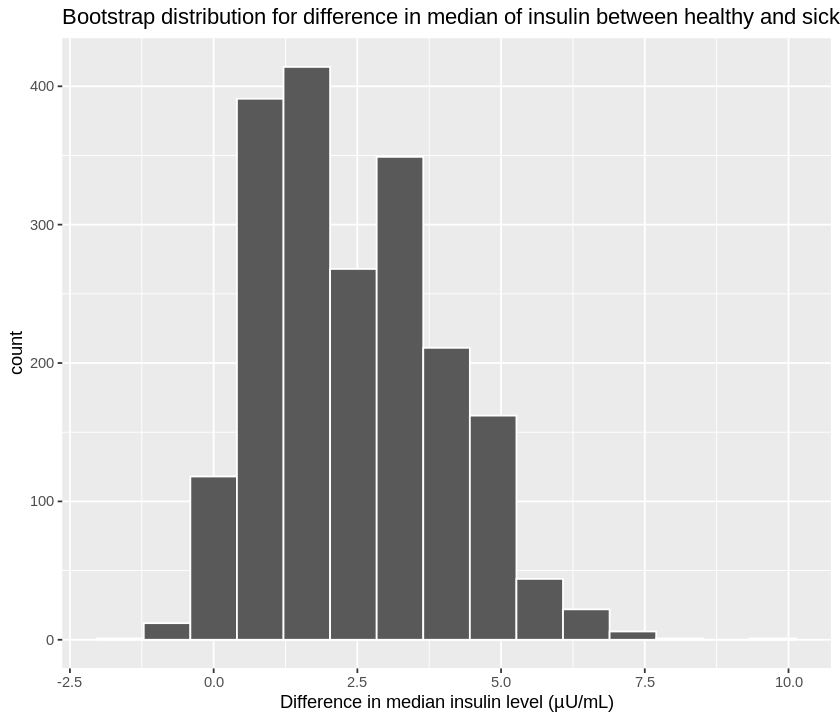

In [23]:
#visualize the bootstrap distribution for difference in medians
visualize_bootstrap_dist_median <- bootstrap_dist_median %>%
visualize(bins=15, color="white") +
ggtitle("Bootstrap distribution for difference in median of insulin between healthy and sick") +
xlab("Difference in median insulin level (µU/mL)")
visualize_bootstrap_dist_median

**Graph II.C.3.1: Bootstrap distribution for difference in median of insulin between healthy and sick**

The bootstrap sampling distribution for the difference in medians was plotted on a histogram. The distribution has most of values fall between 1 µU/mL and 4 µU/mL, with the center being at around 2.4 µU/mL.

In [24]:
#calculte the 95% confidence interval for difference in medians of insulin level
ci_median_bootstrap <- bootstrap_dist_median %>%
get_ci(0.95, "percentile")
ci_median_bootstrap 

lower_ci,upper_ci
<dbl>,<dbl>
0.084,5.54075


**Table II.C.3.2: 95% confidence interval for difference in medians of insulin between healthy and sick**

We use the same get_ci function and percentile method to obtain 95% confidence interval of (0.084, 5.54075). In other words, we are 95% confident that the true difference in median insulin level between healthy people and breast cancer patients is captured by the 95% confidence interval of (0.084, 5.54075). Connecting it to the hypothesis test, this confidence interval is entirely above the hypothesized value 0 and does not capture 0, so we have enough evidence to reject the null hypothesis that there is no difference in median insulin levels and suggest median insulin level for breast cancer patients is higher than that of healthy individuals. 

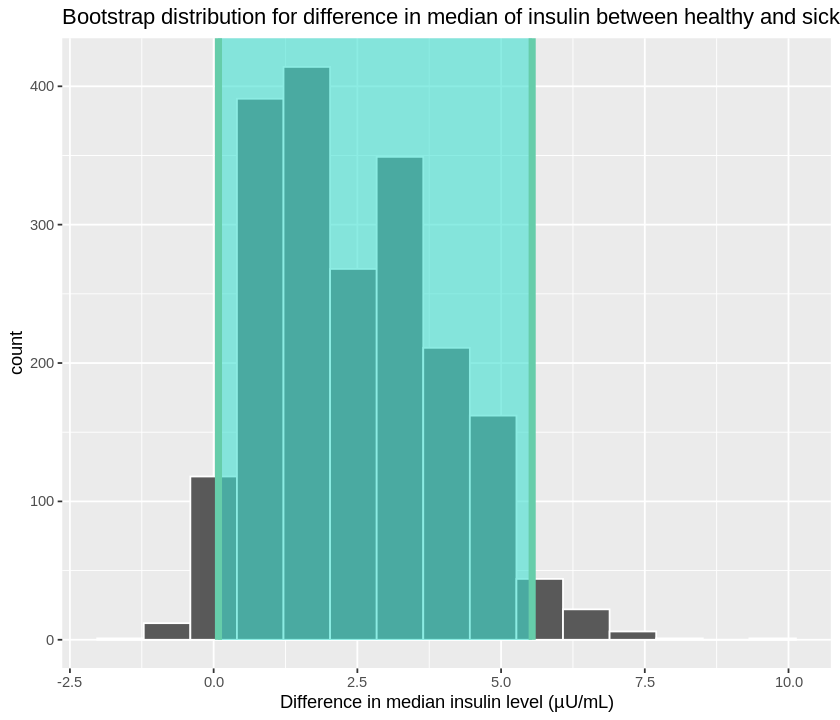

In [25]:
#visualize the 95% confidence interval for difference in medians of insulin level
visualize_bootstrap_ci_median <- visualize_bootstrap_dist_median +
shade_ci(ci_median_bootstrap)
visualize_bootstrap_ci_median

**Graph II.C.3.2: Confidence interval for bootstrap distribution for difference in median of insulin between healthy and sick**

The confidence interval obtained above was visualized on the plotted bootstrap distribution. The shaded area approximately covers a range between 0 and 5.5.

In [26]:
#generate the null distribution of difference in medians of insulin level
null_bootstrap_dist_median <- breast_cancer_tidy %>%
specify(formula = Insulin ~ Diagnosis) %>%
hypothesize("independence")%>%
generate(reps = 2000, type = "permute") %>%
calculate(stat = "diff in medians", order = c("Sick", "Healthy"))
head(null_bootstrap_dist_median)

replicate,stat
<int>,<dbl>
1,1.0135
2,0.7905
3,0.9955
4,0.3925
5,0.5795
6,-0.4900


**Table II.C.3.3: Null distribution for difference in medians of insulin between healthy and sick**

<b>Bootstrap Difference in Median Hypotheses:</b>

$H_0$: There is no difference in the median insulin level between healthy people and breast cancer patients ($Median_s - Median_h = 0$).

$H_a$: The median insulin level of breast cancer patients is greater than the median insulin level of healthy people ($Median_s - Median_h > 0$).


The hypothesis test was performed using the infer package, generating a bootstrap distribution of 2000 bootstrap samples under the null hypothesis of 0 for the difference in medians.

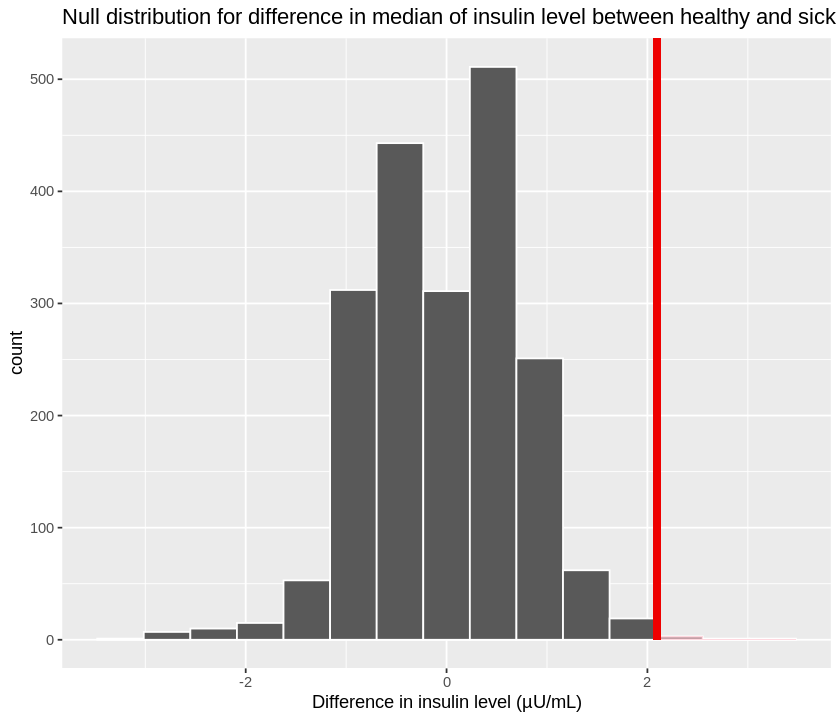

In [27]:
#visualize the null distribution of difference in medians of insulin level
visualize_null_dist_bootstrap_median <- null_bootstrap_dist_median %>%
visualize(bins=15, color="white") +
ggtitle("Null distribution for difference in median of insulin level between healthy and sick") +
xlab("Difference in insulin level (µU/mL)") +
shade_p_value(obs_stat = parameter_estimates$Difference[2], direction = "greater")
visualize_null_dist_bootstrap_median

**Graph II.C.3.3: Null distribution for difference in median of insulin level between healthy and sick**

The null distribution was then visualized by plotting a histogram. The observed test statistic of 2.0965 for the difference in medians is represented by the red vertical line, with the shaded red area to the right representing the p value. Given that this shaded area is relatively small, it may be assumed that the p value is small as well. The null distribution is centered at 0, which is our hypothesized difference. Most values range from -2 µU/mL to 2 µU/mL.

In [28]:
#get the p value
p_bootstrap_median <- null_bootstrap_dist_median %>% 
get_p_value(obs_stat = parameter_estimates$Difference[2], direction = "greater" )
p_bootstrap_median

p_value
<dbl>
0.0025


**Table II.C.3.4: p value for difference in mean of insulin between healthy and sick**

The p value of 0.0025 was again obtained using the infer package (get_p_value). Hence, under the hypothesized difference in medians of 0, the likelihood of observing a test statistic of 2.0965 or something greater is 0.25%, indicating the observed value is an unusually high value. Since the p value is smaller than the significance level of 5%, there is enough evidence to reject the null hypothesis that the median insulin level is the same for healthy people and breast cancer patients, and to suggest that median insulin level for breast cancer patients is higher than patients with breast cancer.

# III. Discussion


### A. Summary of Findings
1. Bootstrap Method for Mean 

The bootstrap sampling distribution with 95% confidence interval did not encompass zero and the derived p-value was smaller than the predetermined significance level. They both provide enough evidence for us to reject the null hypothesis and suggest breast cancer patients have higher mean insulin level.

2. Asymptotic Method for Mean

Similar to the bootstrap method for mean, the confidence interval obtained with the asymptotic method also excluded zero and p value is smaller than significance level, showing a statistically significant difference in means. 

3. Bootstrap Method for Medians

With a confidence interval that has a lower bound above 0 and a p value smaller than significance level, our findings about difference in medians using bootstrap method offers enough evidence to suggest medians of insulin level of breast cancer patients is higher than that of healthy individuals.

In summary, our findings together provides us enough evidence to say breast cancer patients have a higher insulin level compared to healthy individuals, which is the answer to our research question.

### B. Expectations, Implications and Significance
The results we got above matches our initial expectation that breast cancer patients have a higher insulin level compared to healthy individuals. The results we obtained revealed statistically significant differences in insulin levels between healthy individuals and breast cancer patients, where breast cancer patients typically have higher insulin level. 

Our findings carry meaningful implications for health management, public health awareness and clinical practice. Increased awareness about the potential correlation between higher insulin levels and breast cancer may help in emphasizing the importance of regularly monitoring insulin levels as part of preventive health measures. Moreover, this finding strengthens the importance of future research endeavors related to breast cancer concerns and insulin.

### C. Future Directions
Some future questions our study can lead to include:
- Does higher insulin level correlate to higher severity of breast cancer?
- Does the relationship between insulin level and breast cancer vary between different age groups?

Future research can focus on factors that may influence the relationship between breast cancer and insulin levels, such as one's age and ethnicity. Investigating these intricate aspects would be valuable knowledge in developing future treatment strategies.

### D. Limitations

The collection method for the breast cancer dataset was not specified by the UC Irvine Machine Learning Repository. Accordingly, the dataset's methodology needs to be studied further to confirm that it was obtained through random sampling. One concern regarding this issue is that if the dataset was sampled from one location, it may not be representative. Additionally, this breast cancer dataset's sample size, although large enough for us to conduct the analysis we did, may not be sufficient to accurately reflect the population, so it will be good if larger sample size is available. 

It is important to note that p-values only demonstrate the incompatibility of the observed value with null hypothesis, and random variation may lead to different p values. Also, confidence interval does not contain every possible value for parameter. Thus, we should not be overconfident when interpreting the results (Amrhein et al., 2019). It will be helpful to consider other contextual information while also gaining information such as effect size and its uncertainty from other additional approaches, so a more rigorous understanding of the findings can be obtained (Wasserstein & Lazar, 2016).
### E. Conclusion
We conclude that breast cancer patients typically have a higher insulin level than healthy individuals. This was shown by consistent rejection of null hypothesis according to the confidence intervals and p values considering both difference in means and medians of insulin levels. Although these findings have significant implications, it's crucial to consider any potential limitations as the complex correlation between breast cancer and insulin levels requires further study.

# IV. Reference

Amrhein, V., Greenland, S., &amp; McShane, B. (2019). Scientists rise up against statistical significance. Nature, 567(7748), 305–307. https://doi.org/10.1038/d41586-019-00857-9 

Cust, A. E., Stocks, T., Lukanova, A., Lundin, E., Hallmans, G., Kaaks, R., Jonsson, H., & Stattin, P. (2008). The influence of overweight and insulin resistance on breast cancer risk and tumour stage at diagnosis: A prospective study. Breast Cancer Research and Treatment, 113(3), 567–576. https://doi.org/10.1007/s10549-008-9958-8  


Döring, M. (2018, October 26). Mean vs median: When to use which measure?. Data Science Blog: Understand. Implement. Succeed. https://www.datascienceblog.net/post/basic-statistics/mean_vs_median/ 

Ismay, C., & Kim, A. Y. (2023). Statistical Inference via data science. Statistical Inference via Data Science. https://moderndive.com/

Patrcio, M., Pereira, J., Crisstomo, J., Matafome, P., Seia, R., & Caramelo, F. (2018, March 5). Breast cancer coimbra. UCI Machine Learning Repository. https://doi.org/10.24432/C52P59 

Srinivasan, M., Arzoun, H., GK, L. B., & Thangaraj, S. R. (2022). A systematic review: Does insulin resistance affect the risk and survival outcome of breast cancer in women? Cureus. https://doi.org/10.7759/cureus.21712 

Wasserstein, R. L., &amp; Lazar, N. A. (2016). The ASA statement on p-values: Context, process, and purpose. The American Statistician, 70(2), 129–133. https://doi.org/10.1080/00031305.2016.1154108 

World Health Organization. (2023, July). Breast cancer. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/breast-cancer 


